# 🌳 Decision Tree Regression

## 📖 What Is Decision Tree Regression?

**Decision Tree Regression** models the target variable by learning simple decision rules inferred from data features.

It's a **non-parametric** method that splits the input space into regions with approximately constant values.

---

### 🔍 How It Works

- The algorithm recursively splits the dataset into subsets to minimize the **mean squared error (MSE)**.
- At each node, it selects the best feature and split point that minimizes MSE.
- The tree continues growing until stopping criteria are met (e.g., max depth or min samples per leaf).

---

### ⚠️ Pros and Cons

✅ Easy to understand and visualize  
✅ Handles nonlinear relationships well  
✅ Requires little preprocessing (no scaling)

❌ Prone to overfitting  
❌ Sensitive to small data changes  
❌ No smooth predictions (piecewise constant)



## Simulated data

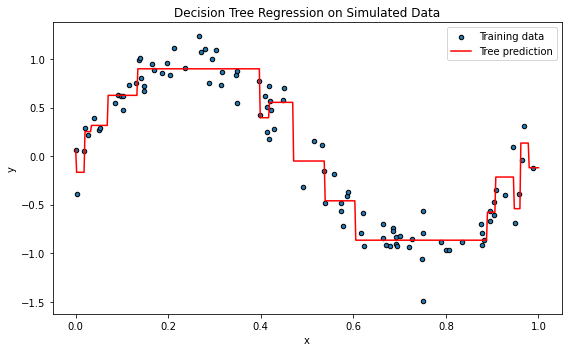

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

np.random.seed(1)
X = np.sort(np.random.rand(100, 1), axis=0)
y = np.sin(2 * np.pi * X).ravel() + np.random.normal(0, 0.2, size=100)
X_plot = np.linspace(0, 1, 500).reshape(-1, 1)

# Fit decision tree
reg = DecisionTreeRegressor(max_depth=4)
reg.fit(X, y)
y_pred = reg.predict(X_plot)

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X, y, s=20, edgecolor="k", label="Training data")
plt.plot(X_plot, y_pred, color="red", label="Tree prediction")
plt.title("Decision Tree Regression on Simulated Data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.tight_layout()
plt.show()

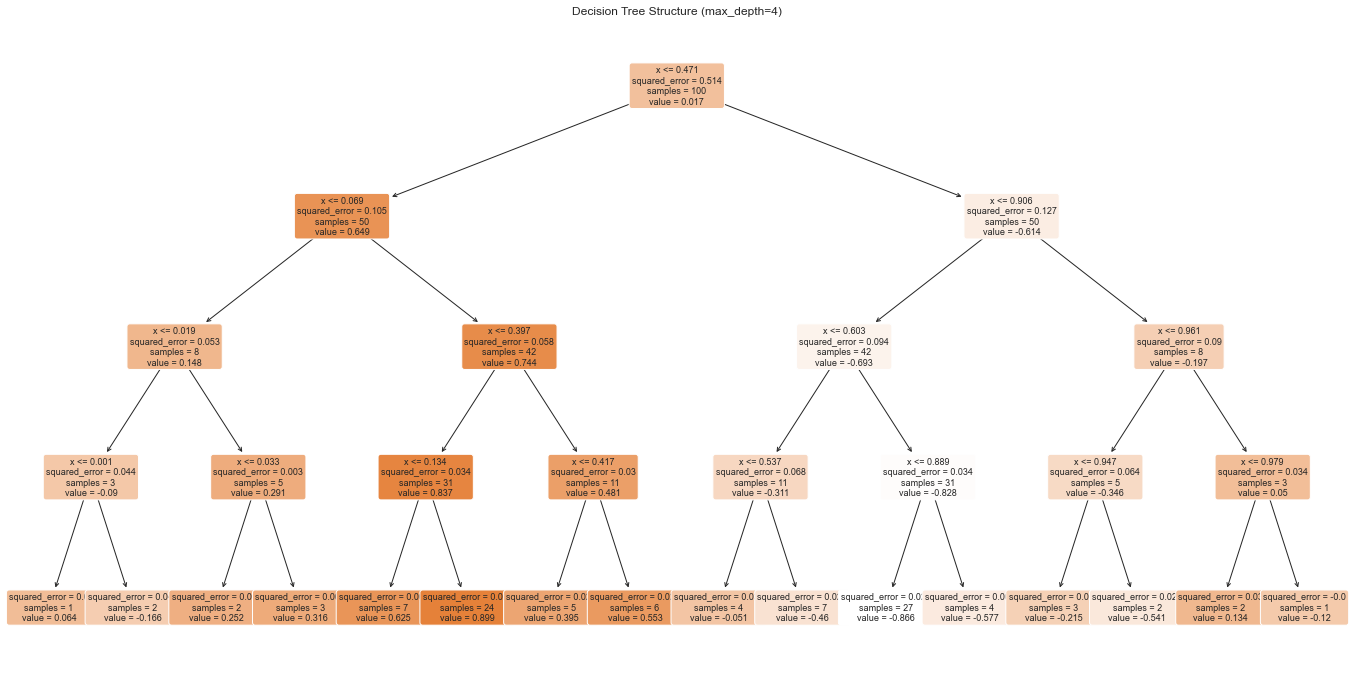

In [9]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
plt.figure(figsize=(24, 12))
plot_tree(reg,
          filled=True,
          feature_names=["x"],
          rounded=True,
          impurity=True,
          label='all',
          fontsize=9)
plt.title("Decision Tree Structure (max_depth=4)")
plt.show()

## 🏠 Real Data: California Housing

In [14]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load data
data = fetch_california_housing()
X_real = data.data
y_real = data.target
X_train, X_test, y_train, y_test = train_test_split(X_real, y_real, test_size=0.2, random_state=0)
# Fit Decision Tree
reg_tree = DecisionTreeRegressor(max_depth=4)
reg_tree.fit(X_train, y_train)
y_pred_tree = reg_tree.predict(X_test)

print("R^2:", r2_score(y_test, y_pred_tree))
print("MSE:", mean_squared_error(y_test, y_pred_tree))

R^2: 0.5422062695485081
MSE: 0.5969423790711924


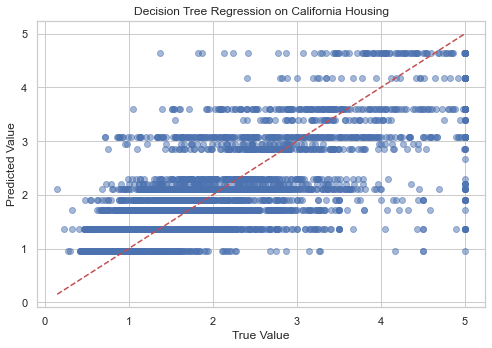

In [15]:
# Plot predicted vs. true
import seaborn as sns
sns.set(style='whitegrid')

plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred_tree, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True Value")
plt.ylabel("Predicted Value")
plt.title("Decision Tree Regression on California Housing")
plt.tight_layout()
plt.show()

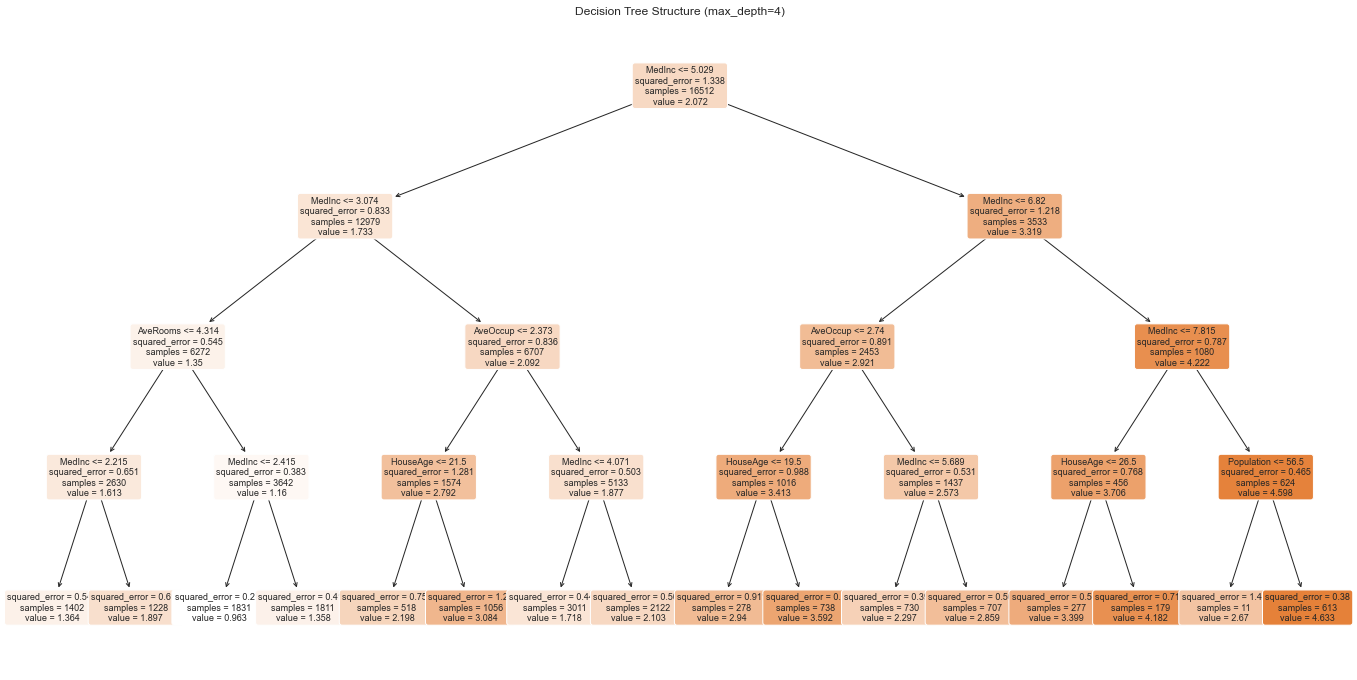

In [17]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
plt.figure(figsize=(24, 12))
plot_tree(reg_tree,
          filled=True,
          feature_names=data.feature_names,
          rounded=True,
          impurity=True,
          label='all',
          fontsize=9)
plt.title("Decision Tree Structure (max_depth=4)")
plt.show()

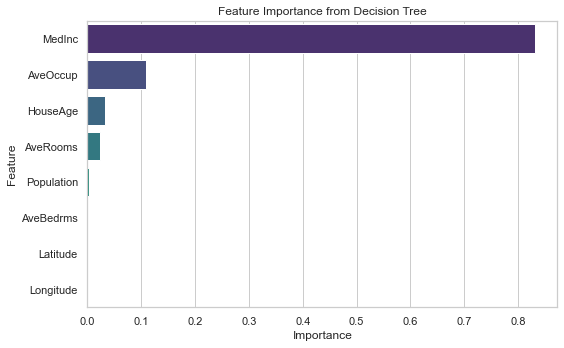

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Feature names from the dataset
feature_names = data.feature_names

# Get importance values
importances = reg_tree.feature_importances_

# Make a DataFrame for nicer plotting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette="viridis")
plt.title("Feature Importance from Decision Tree")
plt.tight_layout()
plt.show()